In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import sem
import scipy.stats as stats

In [2]:
clinicaldata = "raw_data/clinicaltrial_data.csv"
mousedata = "raw_data/mouse_drug_data.csv"

In [3]:
clinicaldata_pd= pd.read_csv(clinicaldata)
mousedata_pd= pd.read_csv(mousedata)
clinicaldata_pd.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
merge_table = pd.merge(mousedata_pd, clinicaldata_pd, on="Mouse ID", how="outer")
merge_table = merge_table.dropna(axis = 1,how="any")

In [5]:
table1 = pd.pivot_table(merge_table,values = "Tumor Volume (mm3)",index = ["Timepoint"],columns = ["Drug"],aggfunc=np.mean)
table1sem = pd.pivot_table(merge_table,values = "Tumor Volume (mm3)",index = ["Timepoint"],columns = ["Drug"],aggfunc=stats.sem)
table1

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
table1["Timepoint"] = [0,5,10,15,20,25,30,35,40,45]

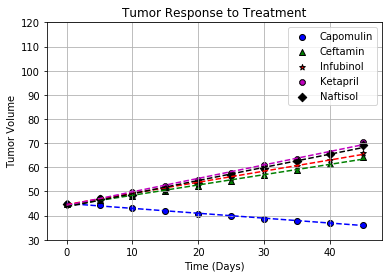

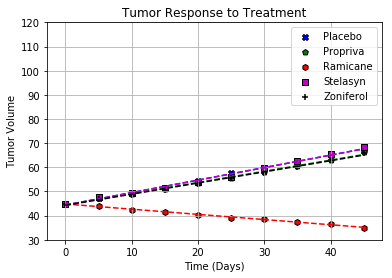

In [7]:
##Making plots to view the drugs next to each other

fig,ax = plt.subplots()
colors = ["b","g","r","m","k","b","g","r","m","k"]
markers = ["o","^","*","8","D","X","p","h","s","+"]

for i in range(((len(table1.columns)-1)-((len(table1.columns)-1))//2)):
    plt.scatter(table1["Timepoint"],table1[table1.columns[i]], marker = markers[i],facecolors =colors[i],edgecolors = "black")
    z = np.polyfit(table1["Timepoint"],table1[table1.columns[i]], 1)
    p = np.poly1d(z)
    plt.plot(table1["Timepoint"],p(table1["Timepoint"]),colors[i]+"--")

plt.legend(loc = "best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume")
plt.ylim(30,120)
plt.grid(True)
plt.show()
    
for i in range(((len(table1.columns)-1)-((len(table1.columns)-1))//2)):
    plt.scatter(table1["Timepoint"],table1[table1.columns[i+5]], marker = markers[i+5],facecolors =colors[i+5],edgecolors = "black")
    z = np.polyfit(table1["Timepoint"],table1[table1.columns[i+5]], 1)
    p = np.poly1d(z)
    plt.plot(table1["Timepoint"],p(table1["Timepoint"]),colors[i+5]+"--")



plt.legend(loc = "best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume")
plt.ylim(30,120)
plt.grid(True)
plt.show()

In [8]:
##Making plots with less variables for visibility of the error bars
fig = plt.figure()
fig.suptitle("Tumor Response to Treatment",fontsize = 16,fontweight = "bold")

Text(0.5,0.98,'Tumor Response to Treatment')

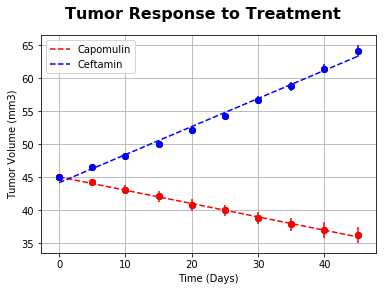

In [9]:
ax1 = fig.add_subplot(111)
ax1.scatter(table1["Timepoint"],table1["Capomulin"], marker = "o",facecolors = "r",edgecolors = "black")
z = np.polyfit(table1["Timepoint"],table1["Capomulin"], 1)
p = np.poly1d(z)
cap, = ax1.plot(table1["Timepoint"],p(table1["Timepoint"]),"r--",label = "Capomulin")
ax1.errorbar(table1["Timepoint"],table1["Capomulin"],yerr = table1sem["Capomulin"],color = "r",fmt = "o")

ax1.scatter(table1["Timepoint"],table1["Ceftamin"], marker = "o",facecolors = "b",edgecolors = "black")
z = np.polyfit(table1["Timepoint"],table1["Ceftamin"], 1)
p = np.poly1d(z)
cap1, = ax1.plot(table1["Timepoint"],p(table1["Timepoint"]),"b--",label = "Ceftamin")
ax1.errorbar(table1["Timepoint"],table1["Ceftamin"],yerr = table1sem["Ceftamin"],color = "b",fmt = "o")

#ax2 = fig.add_subplot(122)
ax1.legend(handles =[cap,cap1],ncol=1)
#ax2.axis("Off")

ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Time (Days)")
ax1.grid(True)
plt.show()

In [10]:
fig1 = plt.figure()
fig1.suptitle("Tumor Response to Treatment",fontsize = 16,fontweight = "bold")

Text(0.5,0.98,'Tumor Response to Treatment')

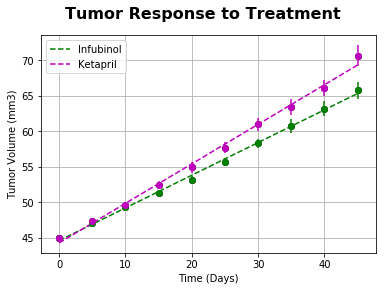

In [11]:
ax3 = fig1.add_subplot(111)
ax3.scatter(table1["Timepoint"],table1["Infubinol"], marker = "o",facecolors = "g",edgecolors = "black")
(slope, intercept, _, _, _) = linregress(table1["Timepoint"], table1["Infubinol"])
fit = slope * table1["Timepoint"] + intercept
cap2, = ax3.plot(table1["Timepoint"], fit, 'g--',label = "Infubinol")
# z = np.polyfit(table1["Timepoint"],table1["Infubinol"], 1)
# p = np.poly1d(z)
# cap2, = ax1.plot(table1["Timepoint"],p(table1["Timepoint"]),"g--",label = "Infubinol")
ax3.errorbar(table1["Timepoint"],table1["Infubinol"],yerr = table1sem["Infubinol"],color = "g",fmt = "o")

ax3.scatter(table1["Timepoint"],table1["Ketapril"], marker = "o",facecolors = "m",edgecolors = "black")
(slope, intercept, _, _, _) = linregress(table1["Timepoint"], table1["Ketapril"])
fit = slope * table1["Timepoint"] + intercept
cap3, = ax3.plot(table1["Timepoint"], fit, 'm--',label = "Ketapril")
# z = np.polyfit(table1["Timepoint"],table1["Ketapril"], 1)
# p = np.poly1d(z)
# cap3, = ax3.plot(table1["Timepoint"],p(table1["Ketapril"]),"m--",label = "Ketapril")
ax3.errorbar(table1["Timepoint"],table1["Ketapril"],yerr = table1sem["Ketapril"],color = "m",fmt = "o")

#ax4 = fig1.add_subplot(122)
ax3.legend(handles =[cap2,cap3],ncol=1)
#ax4.axis("Off")


ax3.set_ylabel("Tumor Volume (mm3)")
ax3.set_xlabel("Time (Days)")
ax3.grid(True)
plt.show()

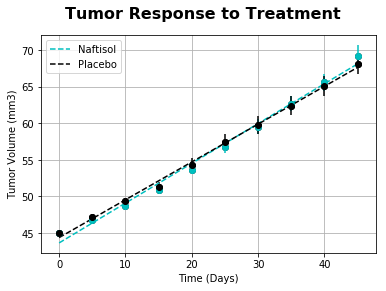

In [12]:
fig2 = plt.figure()
fig2.suptitle("Tumor Response to Treatment",fontsize = 16,fontweight = "bold")
ax4 = fig2.add_subplot(111)
ax4.scatter(table1["Timepoint"],table1["Naftisol"], marker = "o",facecolors = "c",edgecolors = "black")
(slope, intercept, _, _, _) = linregress(table1["Timepoint"], table1["Naftisol"])
fit = slope * table1["Timepoint"] + intercept
cap4, = ax4.plot(table1["Timepoint"], fit, 'c--',label = "Naftisol")
ax4.errorbar(table1["Timepoint"],table1["Naftisol"],yerr = table1sem["Naftisol"],color = "c",fmt = "o")

ax4.scatter(table1["Timepoint"],table1["Placebo"], marker = "o",facecolors = "k",edgecolors = "black")
(slope, intercept, _, _, _) = linregress(table1["Timepoint"], table1["Placebo"])
fit = slope * table1["Timepoint"] + intercept
cap5, = ax4.plot(table1["Timepoint"], fit, 'k--',label = "Placebo")
ax4.errorbar(table1["Timepoint"],table1["Placebo"],yerr = table1sem["Placebo"],color = "k",fmt = "o")


ax4.legend(handles =[cap4,cap5],ncol=1)


ax4.set_ylabel("Tumor Volume (mm3)")
ax4.set_xlabel("Time (Days)")
ax4.grid(True)
plt.show()

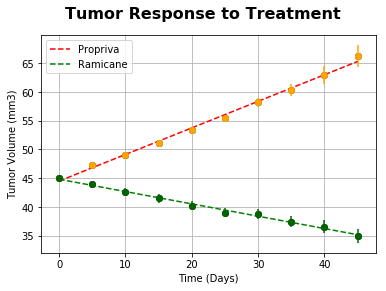

In [13]:
fig3 = plt.figure()
fig3.suptitle("Tumor Response to Treatment",fontsize = 16,fontweight = "bold")
ax5 = fig3.add_subplot(111)
ax5.scatter(table1["Timepoint"],table1["Propriva"], marker = "o",facecolors = "orange",edgecolors = "black")
(slope, intercept, _, _, _) = linregress(table1["Timepoint"], table1["Propriva"])
fit = slope * table1["Timepoint"] + intercept
cap6, = ax5.plot(table1["Timepoint"], fit, 'r--',label = "Propriva")
ax5.errorbar(table1["Timepoint"],table1["Propriva"],yerr = table1sem["Propriva"],color = "orange",fmt = "o")

ax5.scatter(table1["Timepoint"],table1["Ramicane"], marker = "o",facecolors = "darkgreen",edgecolors = "black")
(slope, intercept, _, _, _) = linregress(table1["Timepoint"], table1["Ramicane"])
fit = slope * table1["Timepoint"] + intercept
cap7, = ax5.plot(table1["Timepoint"], fit, 'g--',label = "Ramicane")
ax5.errorbar(table1["Timepoint"],table1["Ramicane"],yerr = table1sem["Ramicane"],color = "darkgreen",fmt = "o")


ax5.legend(handles =[cap6,cap7],ncol=1)


ax5.set_ylabel("Tumor Volume (mm3)")
ax5.set_xlabel("Time (Days)")
ax5.grid(True)
plt.show()

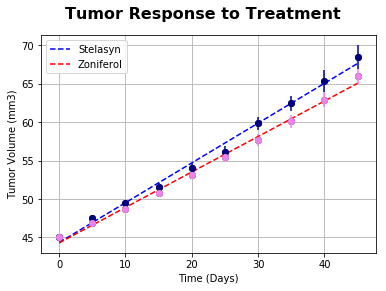

In [14]:
fig4 = plt.figure()
fig4.suptitle("Tumor Response to Treatment",fontsize = 16,fontweight = "bold")
ax6 = fig4.add_subplot(111)
ax6.scatter(table1["Timepoint"],table1["Stelasyn"], marker = "o",facecolors = "navy",edgecolors = "black")
(slope, intercept, _, _, _) = linregress(table1["Timepoint"], table1["Stelasyn"])
fit = slope * table1["Timepoint"] + intercept
cap8, = ax6.plot(table1["Timepoint"], fit, 'b--',label = "Stelasyn")
ax6.errorbar(table1["Timepoint"],table1["Stelasyn"],yerr = table1sem["Stelasyn"],color = "navy",fmt = "o")

ax6.scatter(table1["Timepoint"],table1["Zoniferol"], marker = "o",facecolors = "violet",edgecolors = "black")
(slope, intercept, _, _, _) = linregress(table1["Timepoint"], table1["Zoniferol"])
fit = slope * table1["Timepoint"] + intercept
cap9, = ax6.plot(table1["Timepoint"], fit, 'r--',label = "Zoniferol")
ax6.errorbar(table1["Timepoint"],table1["Zoniferol"],yerr = table1sem["Zoniferol"],color = "violet",fmt = "o")


ax6.legend(handles =[cap8,cap9],ncol=1)


ax6.set_ylabel("Tumor Volume (mm3)")
ax6.set_xlabel("Time (Days)")
ax6.grid(True)
plt.show()

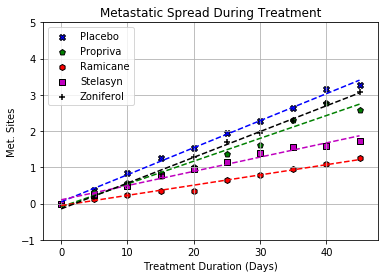

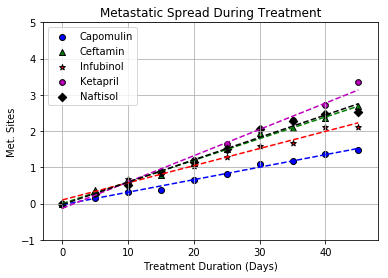

In [15]:
##MetaStatic

merge_table1 = pd.merge(mousedata_pd, clinicaldata_pd, on="Mouse ID", how="outer")
merge_table1 = merge_table1[["Drug","Timepoint","Metastatic Sites"]]
table2sem = pd.pivot_table(merge_table1,values = "Metastatic Sites",index = ["Timepoint"],columns = ["Drug"],aggfunc=stats.sem)

table2 = pd.pivot_table(merge_table1,values = "Metastatic Sites",index = ["Timepoint"],columns = ["Drug"],aggfunc=np.mean)
table2["Timepoint"] = [0,5,10,15,20,25,30,35,40,45]
fig,ax = plt.subplots()
for i in range(((len(table2.columns)-1)-((len(table2.columns)-1))//2)):
    plt.scatter(table2["Timepoint"],table2[table2.columns[i+5]], marker = markers[i+5],facecolors =colors[i+5],edgecolors = "black")
    z = np.polyfit(table2["Timepoint"],table2[table2.columns[i+5]], 1)
    p = np.poly1d(z)
    plt.plot(table2["Timepoint"],p(table2["Timepoint"]),colors[i+5]+"--")



ax.legend(loc = "best")
plt.grid(True)
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.ylim(-1,5)
plt.show()



for i in range(((len(table2.columns)-1)-((len(table2.columns)-1))//2)):
    plt.scatter(table2["Timepoint"],table2[table2.columns[i]], marker = markers[i],facecolors =colors[i],edgecolors = "black")
    z = np.polyfit(table2["Timepoint"],table2[table2.columns[i]], 1)
    p = np.poly1d(z)
    plt.plot(table2["Timepoint"],p(table2["Timepoint"]),colors[i]+"--")

plt.legend(loc = "best")
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.ylim(-1,5)
plt.grid(True)
plt.show()


In [16]:
##Survival Ratees now
merge_table = merge_table.drop("Metastatic Sites", axis = 1)
micesurv = merge_table.pivot_table(merge_table, index=['Drug','Timepoint'], aggfunc='count')


In [17]:

micesurv = micesurv.rename(columns={"Mouse ID": "mouse count"})
mouse_survival = micesurv.pivot_table("mouse count",["Timepoint"],"Drug")

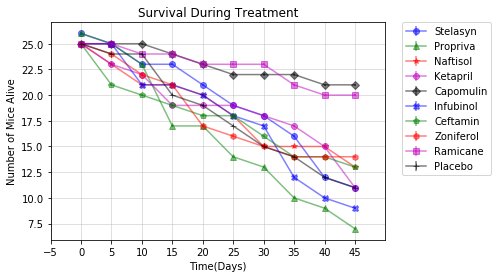

In [18]:


##I wish I figured this out sooner.....
x_axis = np.arange(0, 50, 5)    
plt.xlim(0,50)
drugs = merge_table["Drug"].unique()
drugnum = np.arange(0,len(drugs))

for j in drugs:
    errors = stats.sem(table1sem[drugs[i]])

plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Number of Mice Alive")
plt.grid(alpha = 0.5)
for i in range(len(drugs)):
    plt.errorbar(x_axis, mouse_survival[drugs[i]], yerr = errors, marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])
    
##I googled this plt.legend thing...
plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.xticks(np.arange(min(x_axis)-5, max(x_axis)+5, 5.0))
plt.show()

In [19]:
##Survival Rates

percentsurv = (1-(mouse_survival.iloc[0]- mouse_survival)/mouse_survival.iloc[0])*100
percentsurv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


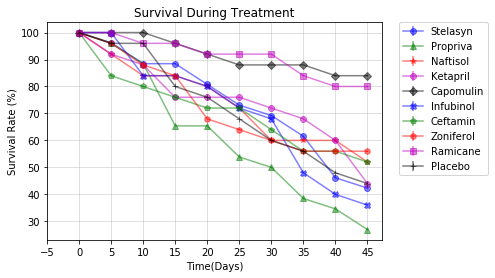

In [20]:

for i in range(len(drugs)):
    plt.errorbar(x_axis, percentsurv[drugs[i]], yerr = errors, marker= markers[i], color= colors[i], alpha = 0.5, label = drugs[i])
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(alpha = 0.5)
plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.)
plt.xticks(np.arange(min(x_axis)-5, max(x_axis)+5, 5.0))
plt.show()

In [21]:
del table1["Timepoint"]
firstlast = table1.iloc[[0,-1]]

In [22]:
percentchange = ((firstlast-firstlast.iloc[0])/firstlast.iloc[0])*100

In [23]:
lastrow = percentchange.loc[1:]
lastrow.sum()

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

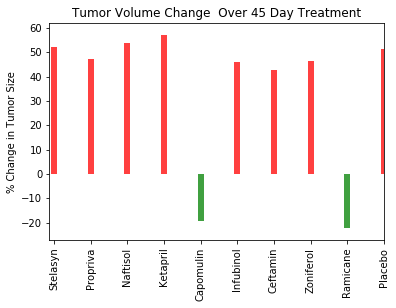

In [24]:
tumorsize = {}
tick_locations = []
for i in range(len(drugs)):
    tumorsize[drugs[i]]=float(lastrow[drugs[i]])
    
for x in x_axis:
    tick_locations.append(x+0.4)

plt.xlim(-0.25, len(drugs))
plt.ylim(min(tumorsize.values()) - 5, max(tumorsize.values()) + 5)
plt.title("Tumor Volume Change  Over 45 Day Treatment")
plt.ylabel("% Change in Tumor Size")

##Googled this as well....
barcol = pd.Series(list(tumorsize.values()))
barcol = barcol > 0
barcol= barcol.map({True: "Red", False: "Green"})
plt.xticks(tick_locations, tumorsize, rotation="vertical")
plt.bar(x_axis, tumorsize.values(), color=barcol, alpha=0.75, align="edge")
plt.show()